學號：0111109069 姓名：李佳毓\
作業題目：上傳Code: LSM, Gradient descent\
繳交期限：2022/9/24 9:30

# LSM (Least Squares Method)

In [1]:
import numpy as np    #矩陣運算資料庫
import matplotlib.pyplot as plt    #畫圖資料庫

In [2]:
np.random.seed(1)    #設定seed(),保證每次執行的結果一樣
m = 100    #樣本數

x1 = 50 + 30 * np.random.rand(m,1)    #生成m*1的array,值從0~1之間隨機產生
y = 135 + 0.5 * x1 + 3 * np.random.randn(m,1)    #截距項&係數(weight),增加隨機誤差,randn()標準常態分配

In [3]:
x1[:5]

array([[62.51066014],
       [71.6097348 ],
       [50.00343124],
       [59.06997718],
       [54.40267672]])

In [4]:
y[:5]

array([[167.20223491],
       [164.73826375],
       [159.08310358],
       [167.01891252],
       [162.89162257]])

## 散布圖(Scatter)

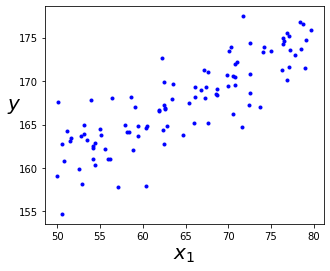

In [5]:
plt.figure(figsize=(5,4))    #設定圖的大小

plt.plot(x1, y, "b.")    #x對y畫藍色點

plt.xlabel("$x_1$", fontsize=20)    #x1文字
plt.ylabel("$y$", rotation=0, fontsize=20)    #y文字,rotation=0直放

plt.savefig("plot_ex1.pdf", dpi=300, bbox_inches='tight')    #savefig()存圖

plt.show()    #每次show出

##  使用sklearn : LinearRegression()

### Fit (試配模型)
<font style=background:yellow><font color=Red>透過LinearRegression()用.fit的方式得到最佳模型<font><style>

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x1, y)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_    #找b和w,適配好模型

(array([137.28624632]), array([[0.46849251]]))

### Predict 

In [8]:
x1_new = np.array([[50], [80]])
                   
lin_reg.predict(x1_new)

array([[160.71087176],
       [174.76564703]])

### Plot the regression model

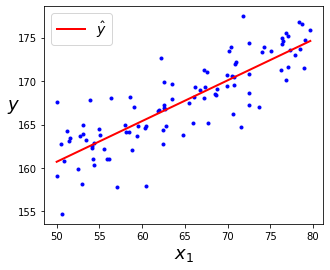

In [9]:
plt.figure(figsize=(5,4))

x1s = np.linspace(x1.min(),x1.max(),10).reshape(-1,1)    #產生一組數列,維度改變成10*1的array
y_pred = lin_reg.predict(x1s)

plt.plot(x1, y, "b.")
plt.plot(x1s, y_pred, "r-", linewidth=2, label="$\hat y$")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

## 適配模型：自己動手刻<br>使用矩陣計算 Nornal Equation

### fit

In [10]:
X = np.c_[np.ones((x1.shape[0], 1)), x1]    #把1跟x1的資料合併,1要產生100筆
X[:5]

array([[ 1.        , 62.51066014],
       [ 1.        , 71.6097348 ],
       [ 1.        , 50.00343124],
       [ 1.        , 59.06997718],
       [ 1.        , 54.40267672]])

In [11]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)    #矩陣運算
theta

array([[137.28624632],
       [  0.46849251]])

### Predict

In [12]:
x1_new = np.array([[50], [80]])
X_new = np.c_[np.ones((2, 1)), x1_new]

y_pred =X_new.dot(theta)    #X_new乘上θ hat
y_pred

array([[160.71087176],
       [174.76564703]])

# Gradient Descent

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(1)

m = 100

x1 = 50 + 30 * np.random.rand(m, 1)
y = 135 + 0.5 * x1 + 3 * np.random.randn(m, 1)

## 資料前處理 ( Preprocessing)
### Feature 標準化 (標準化的過程就是資料前處理)

In [15]:
from sklearn.preprocessing import StandardScaler    

scal = StandardScaler()
x1_scal = scal.fit_transform(x1)
#資料進行標準化,fit會把feature的平均數和標準差算出,transform把feature減平均數再除以標準差,使用fit_transform會把x1做標準常態轉換

x1_scal[:5]

array([[-0.23388437],
       [ 0.79634961],
       [-1.65000333],
       [-0.62345239],
       [-1.15190299]])

In [16]:
scal.mean_, scal.scale_    #平均值,標準差

(array([64.57633783]), array([8.83204675]))

## 配適模型<br>使用sklearn：SGDRegressor()<br>SGD=Stochastic Gradient Descent 隨機梯度下降法
### Fit

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)    #超參數調整, tolerance= ε,eta0=0.1=學習速率的初始值
sgd_reg.fit(x1_scal,y.ravel())    #將標準化過的x, y進行fit(),ravel()把y的shape做轉換

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_    #b, w

(array([167.59478302]), array([4.29447724]))

### Predict

In [19]:
x1_new = [[50], [80]]

x1_new_scal = scal.transform(x1_new)    #不能直接帶入模型，把feature先做標準化

In [20]:
sgd_reg.predict(x1_new_scal)

array([160.50721286, 175.09435451])

<font style=background:yellow><font color=Red>SGD找到的θ ,所代進cost function得到mse並不一定會是最小值，它會在最小值附近跳動
所以會有一些小差異，但是不會差很多<font><style>

### 適配模型：自己動手刻

In [21]:
X = np.c_[np.ones((m, 1)), x1_scal]

### 批次梯度下降法

In [22]:
n_iterations = 1000
eta = 0.1    #學習速率

theta = np.random.randn(2,1)    #隨機產生theta

for t in range(n_iterations):    #從0開始做1000次
    gd = 2 / m * X.T.dot(X.dot(theta) - y)    #算出梯度
    theta = theta - eta * gd

In [23]:
theta

array([[167.53977684],
       [  4.13774774]])

### 隨機梯度下降法 with Leaning Schedule
<font style=background:yellow><font color=Red>eta(學習速率)最好能夠follow Learning Schedule,讓它越來越小越好<font><style>

In [24]:
def learning_schedule(t, t0, t1):
    return t0 / (t + t1)    #持續update t,每次遞迴t就會增加一點點,分母越大傳回去eta越小

In [25]:
n_epochs = 50

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):        

        ind = np.random.randint(m)   #決定抽取哪個樣本
        xi = X[ind:ind+1].T
        yi = y[ind:ind+1]

        eta = learning_schedule(epoch * m + i, 5, 50)    #epoch是面的迴圈,做50次

        gd = 2 * xi.dot(xi.T.dot(theta) - yi)
        theta = theta - eta * gd

In [26]:
theta

array([[167.56457812],
       [  4.28255271]])

### 小批次梯度下降法 with Leaning Schedule
<font style=background:yellow><font color=Red>從m個樣本裡隨機去抽出一定的數量<font><style>

In [27]:
n_epochs = 50
minibatch_size = 20    #決定抽取數量

theta = np.random.randn(2,1)

t = 0
for epoch in range(n_epochs):

    ind = np.random.permutation(m)    #把樣本打散
    X_shuffled = X[ind]
    y_shuffled = y[ind]
    
    for i in range(0, m, minibatch_size):   

        Xi = X_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        t += 1
        eta = learning_schedule(t, 5, 50)    #t原始為0,每進行一次t會+1,最後回傳的Learning Schedule會越小

        gd = 2 / minibatch_size * Xi.T.dot(Xi.dot(theta) - yi)
        theta = theta - eta * gd

In [28]:
theta

array([[167.53935069],
       [  4.13202083]])

<font style=background:yellow><font color=Red>總共100樣本,一次抽取20,共會抽取5次,結束之後會把樣本再做一次打散,繼續進行這個小批次的梯度下降法,一直做50次,epoch 50次最後得到 theta<font><style>